In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining the data

In [2]:
df = pd.read_csv('Datafile 1.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

# Summary Statistics

In [4]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


1 The mean is more than median 50% percentile in all columns.

2 There is a large difference in 75% percentile and max in umnamed 0.

3 The 1 and 2 observation suggest that there are extreme outliers present in these three columns.

In [5]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Here all sumn values will be zero

In [6]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

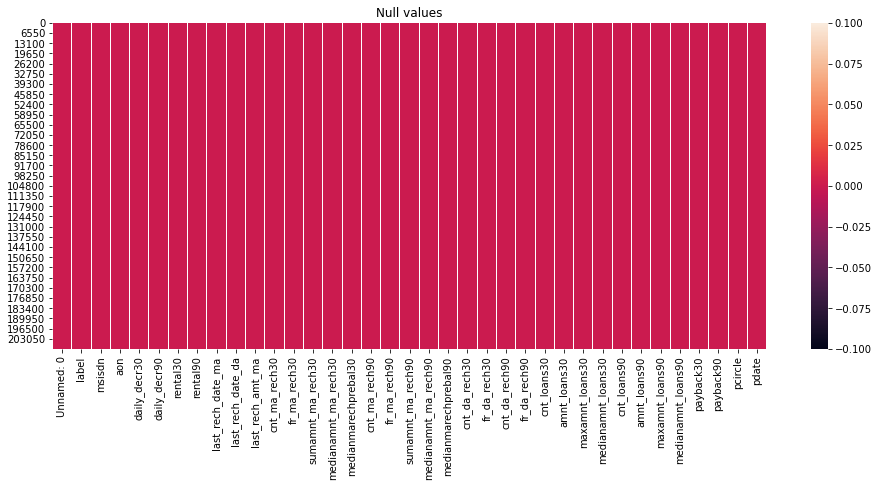

In [7]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

Here heat plot we are mentioning the null values

In [8]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [9]:
df['msisdn'].value_counts()

47819I90840    7
04581I85330    7
22038I88658    6
94119I84456    6
43430I70786    6
              ..
92589I70786    1
38395I89231    1
12581I88659    1
71784I90845    1
18864I70376    1
Name: msisdn, Length: 186243, dtype: int64

In [10]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

In [11]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [12]:
df['pdate'].unique()

array(['2016-07-20', '2016-08-10', '2016-08-19', '2016-06-06',
       '2016-06-22', '2016-07-02', '2016-07-05', '2016-08-05',
       '2016-06-15', '2016-06-08', '2016-06-12', '2016-06-20',
       '2016-06-29', '2016-06-16', '2016-08-03', '2016-06-24',
       '2016-07-04', '2016-07-03', '2016-07-01', '2016-08-08',
       '2016-06-26', '2016-06-23', '2016-07-06', '2016-07-09',
       '2016-06-10', '2016-06-07', '2016-06-27', '2016-08-11',
       '2016-06-30', '2016-06-19', '2016-07-26', '2016-08-14',
       '2016-06-14', '2016-06-21', '2016-06-25', '2016-06-28',
       '2016-06-11', '2016-07-27', '2016-07-23', '2016-08-16',
       '2016-08-15', '2016-06-02', '2016-06-05', '2016-08-02',
       '2016-07-28', '2016-07-18', '2016-08-18', '2016-07-16',
       '2016-07-29', '2016-07-21', '2016-06-03', '2016-06-13',
       '2016-08-01', '2016-07-13', '2016-07-10', '2016-06-09',
       '2016-07-15', '2016-07-11', '2016-08-09', '2016-08-12',
       '2016-07-22', '2016-06-04', '2016-07-24', '2016-

In [13]:
df['pdate'].value_counts()

2016-07-04    3150
2016-07-05    3127
2016-07-07    3116
2016-06-20    3099
2016-06-17    3082
              ... 
2016-06-04    1559
2016-08-18    1407
2016-08-19    1132
2016-08-20     788
2016-08-21     324
Name: pdate, Length: 82, dtype: int64

Here pdate,pcircle,msisdn are the independent varibles

# EDA(univariate,bivariate and multivariate)

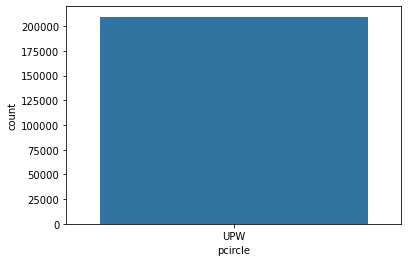

In [14]:
sns.countplot(df['pcircle']);

All columns are equally distributed there is no imbalance issue exits

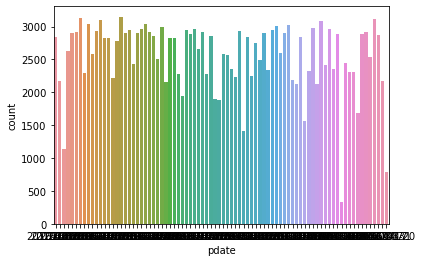

In [15]:
sns.countplot(df['pdate']);

All columns are not equally distributed there is class imbalance issue exits

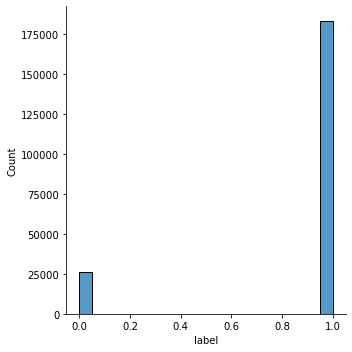

In [16]:
sns.displot(df['label'])

here some columns are equally distributed some columns are not equally distributed because imbalance issue 

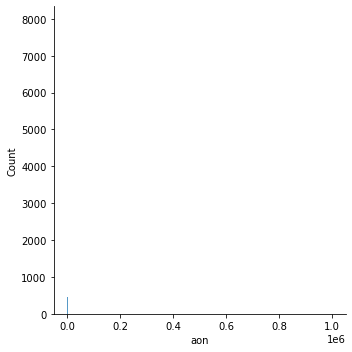

In [17]:
sns.displot(df['aon'])

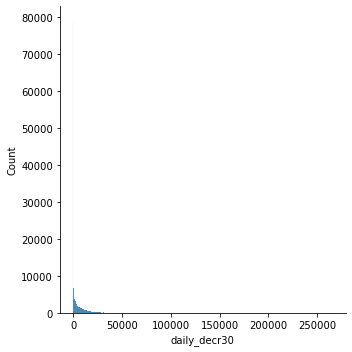

In [18]:
sns.displot(df['daily_decr30'])

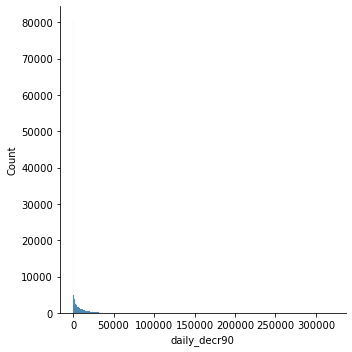

In [19]:
sns.displot(df['daily_decr90'])

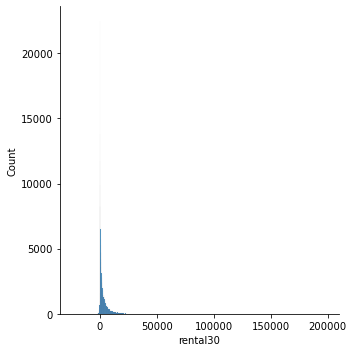

In [20]:
sns.displot(df['rental30'])

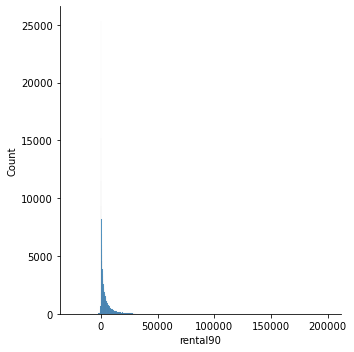

In [21]:
sns.displot(df['rental90'])

<AxesSubplot:xlabel='aon'>

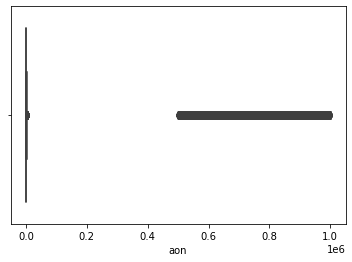

In [22]:
sns.boxplot(df["aon"])

there is no outlet in the aon columns

<AxesSubplot:xlabel='daily_decr30'>

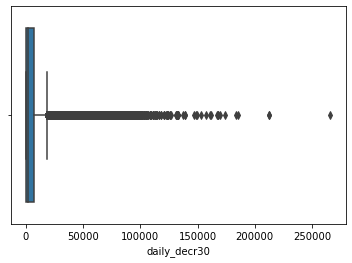

In [23]:
sns.boxplot(df["daily_decr30"])

<AxesSubplot:xlabel='daily_decr90'>

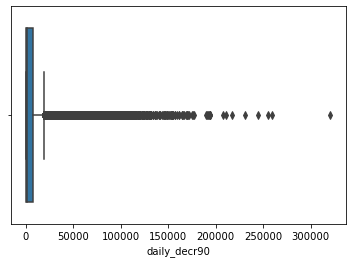

In [24]:
sns.boxplot(df["daily_decr90"])

Text(0.5, 0, 'pcircle')

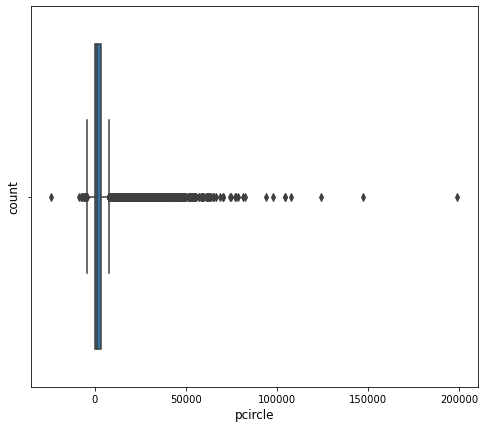

In [25]:
count = df['pcircle'].value_counts()
plt.figure(figsize=(8,7))
sns.boxplot(df["rental30"])
plt.ylabel('count',fontsize=12)
plt.xlabel('pcircle',fontsize=12)

<AxesSubplot:xlabel='rental90'>

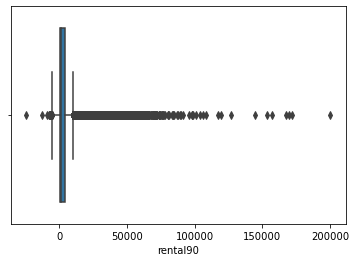

In [26]:
sns.boxplot(df["rental90"])

there is outlet on the daily_decr30.daily_decr90,rental30,rental90  columns

# Bi Variate analysis

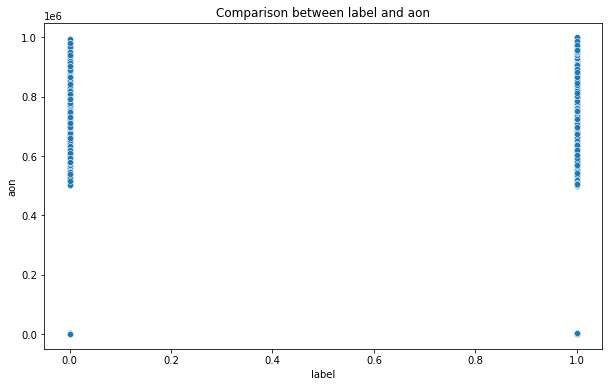

In [27]:
plt.figure(figsize=[10,6])
plt.title('Comparison between label and aon')
sns.scatterplot(df['label'],df['aon']);

here we can plot aon and label plot but not identified clearly

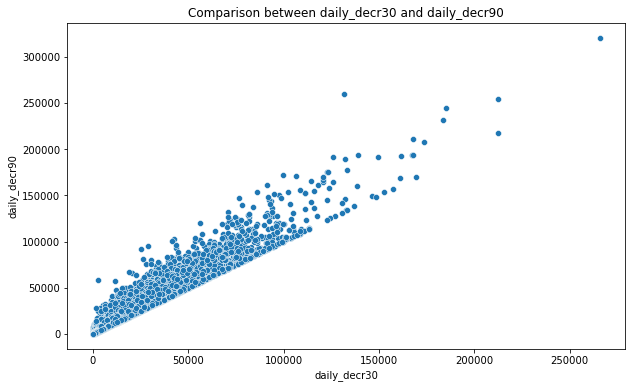

In [28]:
plt.figure(figsize=[10,6])
plt.title('Comparison between daily_decr30 and daily_decr90')
sns.scatterplot(df['daily_decr30'],df['daily_decr90']);

here  we can plot daily_decr30 and daily_decr90 plots

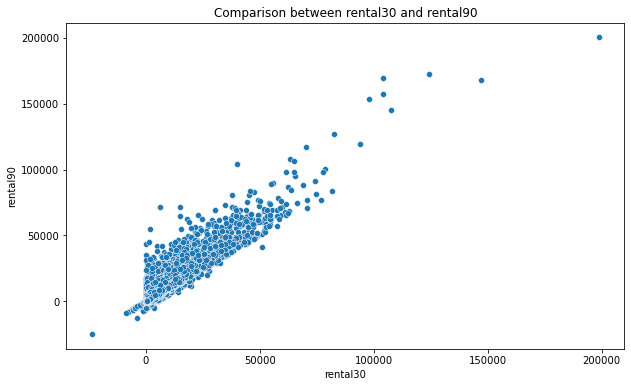

In [29]:
plt.figure(figsize=[10,6])
plt.title('Comparison between rental30 and rental90')
sns.scatterplot(df['rental30'],df['rental90']);

here we can plot rental30 and rental90 plots

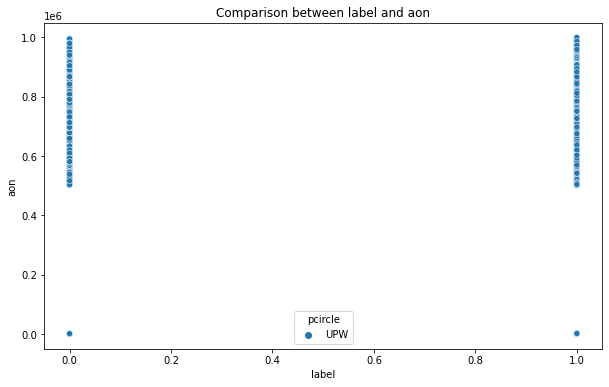

In [30]:
plt.figure(figsize=[10,6])
plt.title('Comparison between label and aon')
sns.scatterplot(df['label'],df['aon'],hue=df["pcircle"]);

here one more is added to aon and label that is pcircle we can easily identified here plots

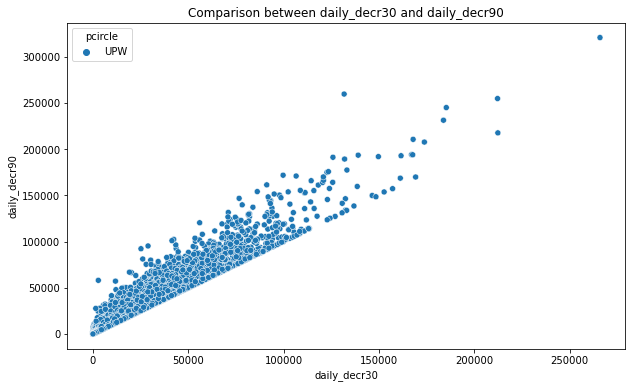

In [31]:
plt.figure(figsize=[10,6])
plt.title('Comparison between daily_decr30 and daily_decr90')
sns.scatterplot(df['daily_decr30'],df['daily_decr90'],hue=df["pcircle"]);

here one more is added to daily_decr30 and daily_decr90 that is pcircle we can easily identified here plots

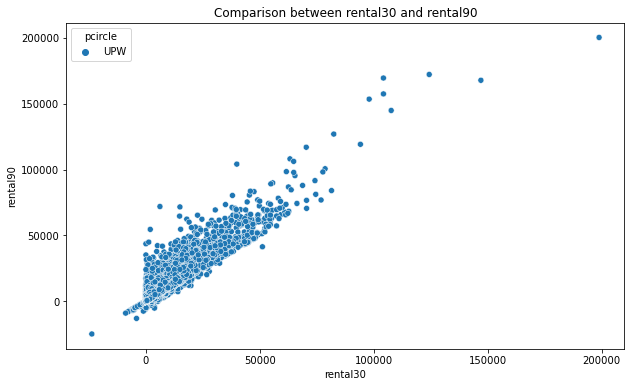

In [32]:
plt.figure(figsize=[10,6])
plt.title('Comparison between rental30 and rental90')
sns.scatterplot(df['rental30'],df['rental90'],hue=df["pcircle"]);

here one more is added to rental30 and rental90 that is pcircle we can easily identified here plots

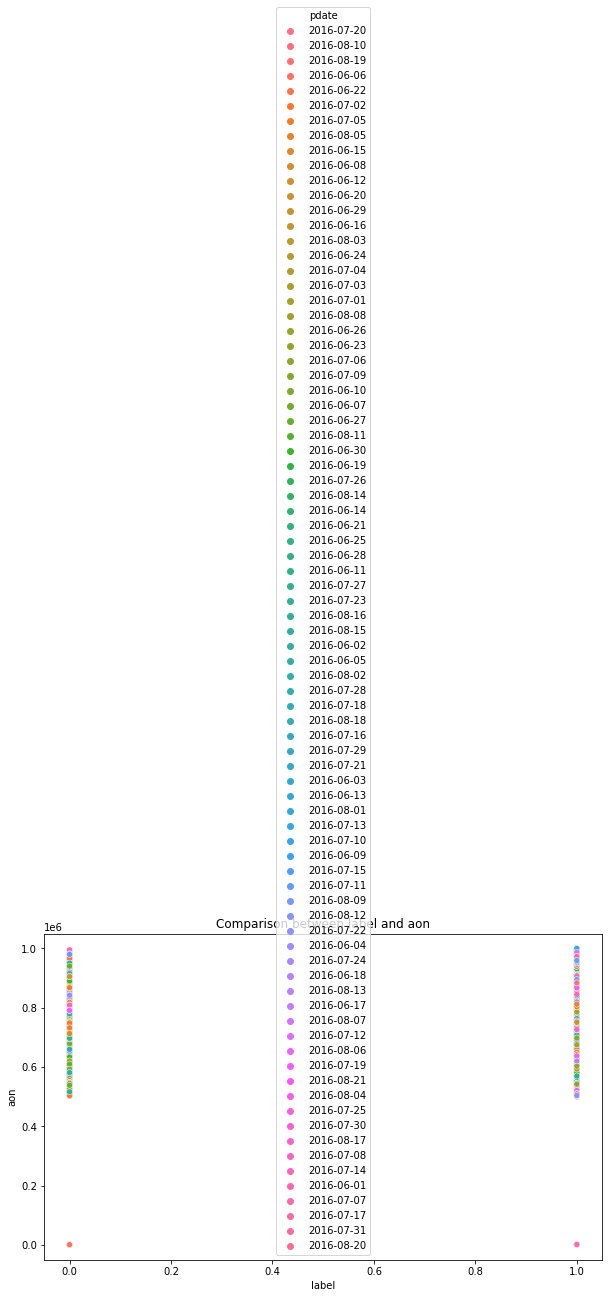

In [33]:
plt.figure(figsize=[10,6])
plt.title('Comparison between label and aon')
sns.scatterplot(df['label'],df['aon'],hue=df["pdate"]);

here one more is added to aon and label that is pdate we can easily identified here plots

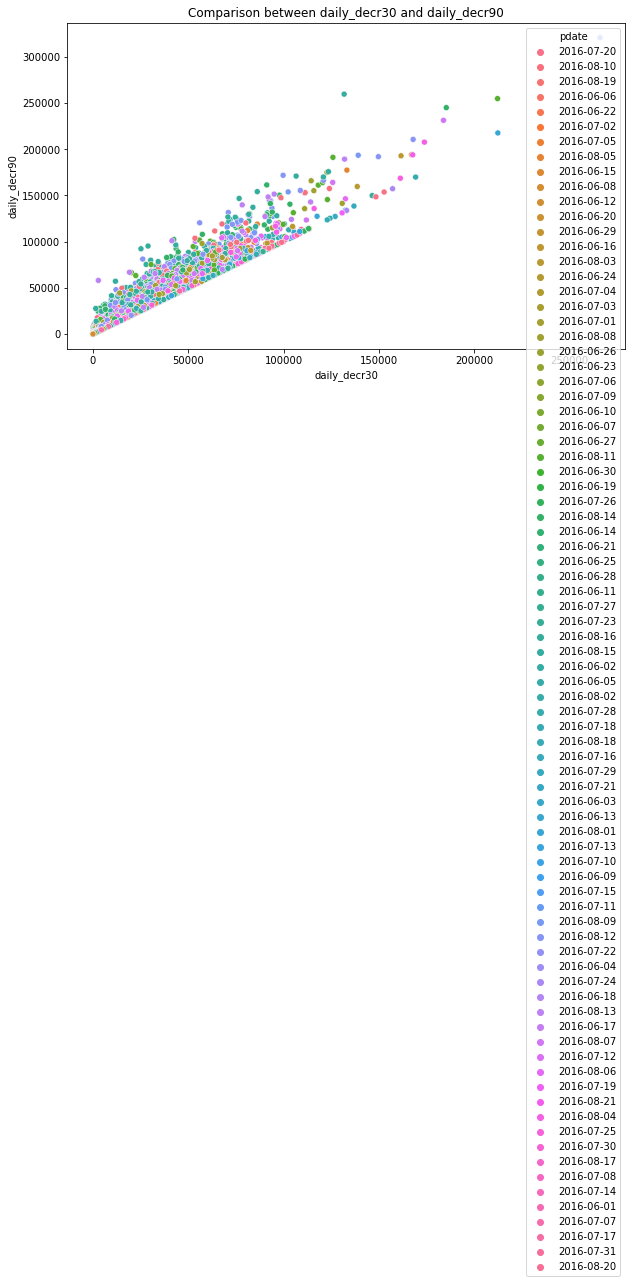

In [34]:
plt.figure(figsize=[10,6])
plt.title('Comparison between daily_decr30 and daily_decr90')
sns.scatterplot(df['daily_decr30'],df['daily_decr90'],hue=df["pdate"]);

here one more is added to daily_decr30 and daily_decr90 that is pdate we can easily identified here plots

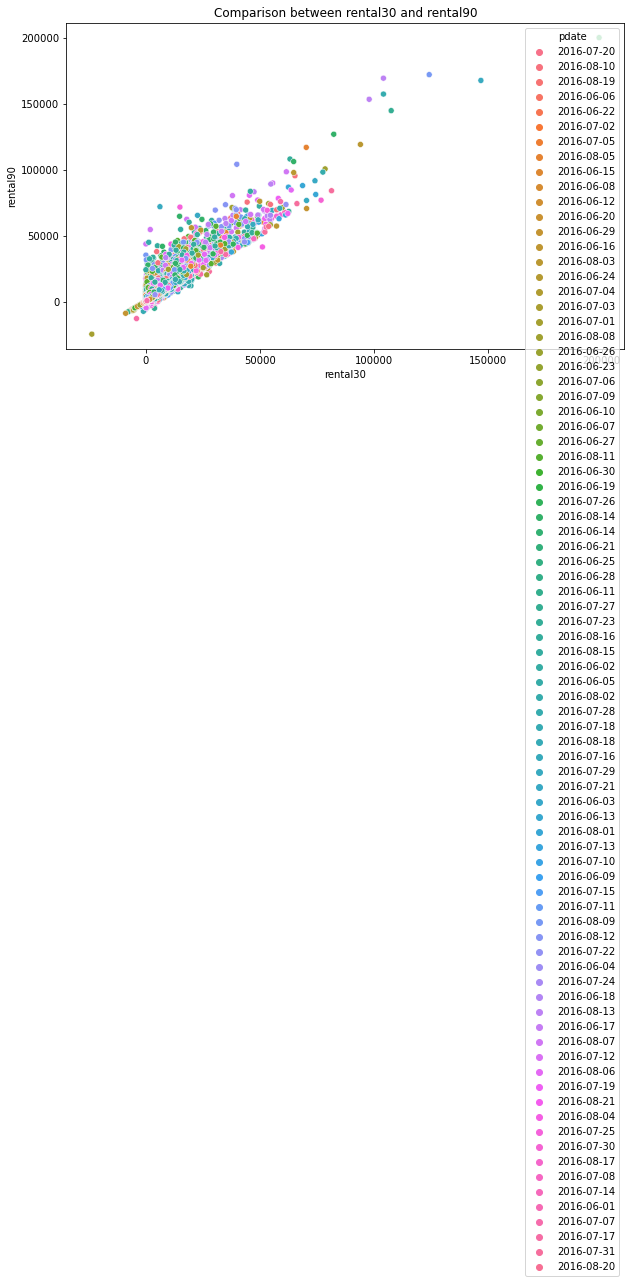

In [35]:
plt.figure(figsize=[10,6])
plt.title('Comparison between rental30 and rental90')
sns.scatterplot(df['rental30'],df['rental90'],hue=df["pdate"]);

here one more is added to rental30 and rental90 that is pdate we can easily identified here plots

In [36]:
cor = df.corr()

In [37]:
cor

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


<AxesSubplot:>

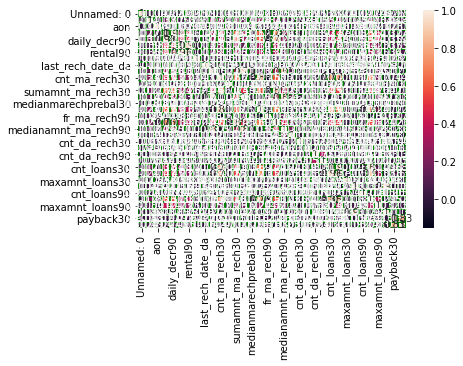

In [38]:
sns.heatmap(cor,annot=True,linewidth=1,linecolor='green')

Here heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolated

In [39]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["pcircle"]=LE.fit_transform(df["pcircle"])


In [40]:
df["pcircle"].unique()

array([0])

In [41]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["pdate"]=LE.fit_transform(df["pdate"])


In [42]:
df["pdate"].unique()

array([49, 70, 79,  5, 21, 31, 34, 65, 14,  7, 11, 19, 28, 15, 63, 23, 33,
       32, 30, 68, 25, 22, 35, 38,  9,  6, 26, 71, 29, 18, 55, 74, 13, 20,
       24, 27, 10, 56, 52, 76, 75,  1,  4, 62, 57, 47, 78, 45, 58, 50,  2,
       12, 61, 42, 39,  8, 44, 40, 69, 72, 51,  3, 53, 17, 73, 16, 67, 41,
       66, 48, 81, 64, 54, 59, 77, 37, 43,  0, 36, 46, 60, 80])

In [43]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21


# plotting outliers

<AxesSubplot:>

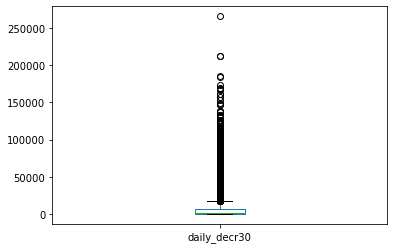

In [44]:
df["daily_decr30"].plot.box()

<AxesSubplot:>

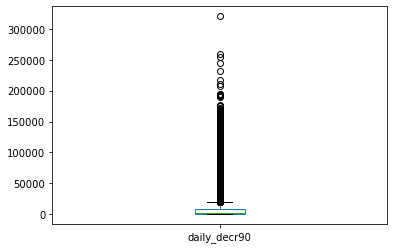

In [45]:
df["daily_decr90"].plot.box()

<AxesSubplot:>

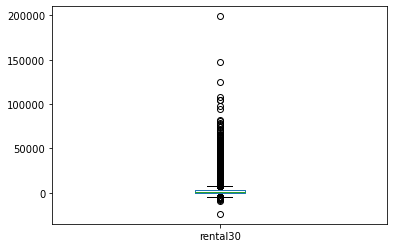

In [46]:
df["rental30"].plot.box()

<AxesSubplot:>

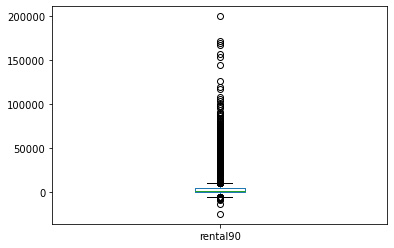

In [47]:
df["rental90"].plot.box()

<AxesSubplot:>

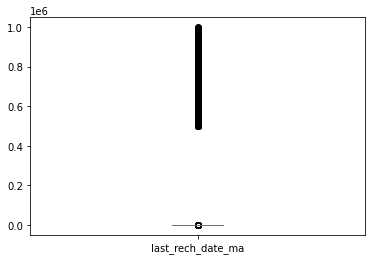

In [48]:
df["last_rech_date_ma"].plot.box()

Here all boxplots have outside the viscous so we can find here outliers easily.

In [49]:
df.shape

(209593, 37)

we are obesrving here dataset contains 209593 rows and 37 columns

# To check the ditribution of skewnes

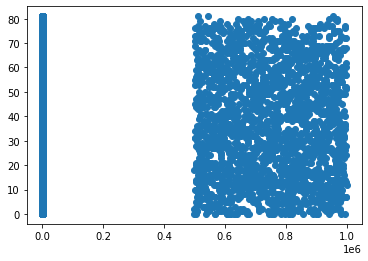

In [50]:
plt.scatter(df['aon'],df['pdate'])
plt.show()

here scattering of aon and pdate plot

In [51]:
df.drop('msisdn',axis=1,inplace=True)
df.head()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21


In [52]:
df.drop('aon',axis=1,inplace=True)
df.head()

,Unnamed: 0,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21


In [53]:
df.shape

(209593, 35)

here 209593 rows and 35 columns

In [54]:
pd.set_option("display.max_columns", 35)

In [55]:
df.head()

,Unnamed: 0,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,49
1,2,1,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,70
2,3,1,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,79
3,4,1,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,5
4,5,1,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,21


In [56]:
df.columns

Index(['Unnamed: 0', 'label', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

here we can obeserve the different columns

In [57]:
df.drop([ 'pdate', 'pcircle'], axis=1, inplace = True)

# Removing outliers

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.73204254, 2.64789583, 0.25229941, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [1.73202602, 0.37765836, 0.73103667, ..., 0.22959366, 0.38562959,
        0.41923266],
       [1.73200949, 0.37765836, 0.43201111, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [1.73200949, 0.37765836, 0.70079045, ..., 0.22959366, 0.06820893,
        0.04735622],
       [1.73202602, 0.37765836, 0.77075515, ..., 0.22959366, 0.38562959,
        0.59938541],
       [1.73204254, 0.37765836, 0.09674426, ..., 0.22959366, 0.38562959,
        0.41923266]])

here removing the outlier of the df

In [59]:
z_scores = zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

new_df.head(5)

,Unnamed: 0,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,1,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,1,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,1,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,1,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [60]:
df.shape

(209593, 33)

we obesrving the 209593 rows and 33 columns

In [61]:
new_df.shape

(163063, 33)

we are observing new difference of 163063 rows and 33 columns

# Feature Engineering 

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [63]:
scaledX

array([[-1.73204254, -2.64789583, -0.25229941, ..., -0.22959366,
         2.9046997 ,  2.39409346],
       [-1.73202602,  0.37765836,  0.73103667, ..., -0.22959366,
        -0.38562959, -0.41923266],
       [-1.73200949,  0.37765836, -0.43201111, ..., -0.22959366,
        -0.38562959, -0.41923266],
       ...,
       [ 1.73200949,  0.37765836,  0.70079045, ..., -0.22959366,
         0.06820893, -0.04735622],
       [ 1.73202602,  0.37765836,  0.77075515, ..., -0.22959366,
        -0.38562959,  0.59938541],
       [ 1.73204254,  0.37765836, -0.09674426, ..., -0.22959366,
        -0.38562959, -0.41923266]])

the standard scaler values of the following

In [64]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [65]:
Y.explained_variance_ratio_

array([0.21017283, 0.09694684, 0.05919891, 0.057367  , 0.05137115,
       0.04052121, 0.03182676, 0.03068342, 0.03053299, 0.03042329,
       0.03033829, 0.03028048, 0.03022583, 0.03015283, 0.0301115 ,
       0.03006751, 0.02985192, 0.0274583 , 0.02555299, 0.02447247,
       0.0197026 , 0.01564695, 0.00886431, 0.00626263, 0.00545173,
       0.00502674, 0.00403683, 0.00263017, 0.00178286, 0.00125198,
       0.00072074, 0.00061847, 0.00044746])

the varience ratio of the PCA

In [66]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 21.01728345,  30.71196711,  36.63185843,  42.36855852,
        47.50567348,  51.55779445,  54.74047083,  57.80881283,
        60.86211216,  63.90444152,  66.93827092,  69.96631895,
        72.98890161,  76.00418454,  79.015335  ,  82.02208612,
        85.00727813,  87.75310779,  90.30840629,  92.75565305,
        94.72591255,  96.29060764,  97.17703862,  97.80330212,
        98.34847491,  98.85114928,  99.25483204,  99.51784876,
        99.69613502,  99.82133339,  99.89340762,  99.95525436,
       100.        ])

the  varience accracy ratio of PCA

In [67]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 26


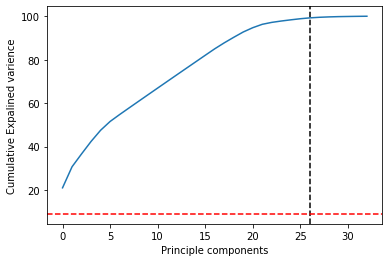

In [68]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

Here the y label define the cumulative explained varience and x label defined the principal components

In [69]:
FinalPCA = PCA(n_components=31)
FinalData = FinalPCA.fit_transform(scaledX)

In [70]:
FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-1.694825,-0.256967,2.573507,-1.562028,-2.037401,-0.121961,-1.430810,0.126705,-0.977235,0.434934,0.305404,0.103370,1.233328,0.550555,0.125724,-0.139009,-0.631050,-0.573778,-1.267549,2.031530,0.004377,0.053612,-0.158498,-0.018173,0.006827,-0.389779,-0.000986,0.000640,-0.018110,0.061380,-0.001168
1,0.498693,3.203512,-0.251408,-0.446935,0.597993,-0.155877,-0.788194,0.252885,-0.871138,0.332026,0.096622,0.046030,1.180059,0.485634,-0.235148,-0.072669,-1.123520,0.876861,-1.160755,-2.044980,-0.159662,-0.048520,-0.408975,-0.183012,-0.786572,-0.315360,0.044332,-0.005272,0.088682,-0.116706,-0.094091
2,-1.925478,0.131586,-0.525062,-0.197422,0.364923,-0.078667,-0.066261,0.174223,-0.965978,0.342811,0.290278,0.132344,1.201352,0.467685,0.190367,-0.199595,-0.333986,0.263425,0.578219,-0.689447,-0.038244,-0.234588,0.091424,-0.050013,-0.076877,-0.029753,-0.031878,0.004625,0.029159,-0.018645,0.017754
3,-2.074432,-0.724334,-0.579864,-0.073158,0.276157,-0.029643,-0.031478,0.191799,-0.943315,0.336508,0.248786,0.109626,1.201936,0.458235,0.110111,-0.191924,-0.470783,0.308190,0.393044,-0.728505,-0.039879,-0.472107,0.265438,0.181969,0.252944,0.073606,0.241375,0.003531,-0.057007,-0.013929,-0.116482
4,1.566482,-0.690373,-1.396193,0.004561,-1.335267,0.303416,0.414569,0.115428,-1.002262,0.331850,0.349296,0.199209,1.263309,0.419443,0.306335,-0.310144,-0.124094,-0.977888,-0.299321,-0.500398,-0.023650,0.129492,0.937678,-0.020521,0.182932,0.138309,0.277018,0.033944,-0.104334,0.072040,-0.094588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.723238,1.155540,-0.932723,-0.329802,-0.436306,0.039402,-0.100263,-0.099824,0.883834,-0.228255,-0.446292,0.118124,-1.104308,-0.591915,-0.055297,0.137875,0.600472,-0.529060,0.290217,-0.724749,-0.050130,0.151810,0.075428,0.142954,0.045690,0.013576,-0.093407,0.010474,0.095064,0.017635,0.004735
209589,-0.985612,-1.035772,-0.548989,-0.052332,0.059814,-0.021037,0.142284,-0.090568,0.871180,-0.233396,-0.432839,0.128913,-1.132530,-0.615457,-0.004835,0.116359,0.703717,-0.026867,0.260227,-0.508485,-0.052566,0.013328,0.025059,-0.038332,-0.057710,-0.023022,0.002625,-0.003672,-0.115068,-0.049585,-0.025323
209590,2.457236,-0.787026,0.560271,-0.052613,0.765694,-0.242939,-0.264650,0.021174,0.980609,-0.257336,-0.656182,0.008303,-1.177468,-0.626533,-0.470839,0.225298,-0.134912,0.988617,-1.438378,-1.232342,-0.186863,0.298288,0.077386,-0.126049,0.179469,-0.054812,0.013478,-0.080532,0.019224,0.061412,-0.097238
209591,0.875200,-0.052459,0.229479,-0.086316,0.303634,1.541960,-1.381580,0.030625,0.970032,-0.202667,-0.702681,-0.024089,-1.253462,-0.518763,-0.529441,0.349372,-0.320203,2.022798,-0.441983,-0.801455,1.637896,0.919381,0.203103,-0.100365,-0.329823,0.559565,0.663489,0.017352,0.293385,0.049570,-0.046502


# Different visualization of varience

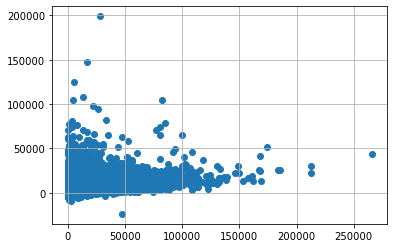

In [71]:
var = 'daily_decr30'
plt.scatter(x = df['daily_decr30'],y = df['rental30'],)
plt.grid(True)

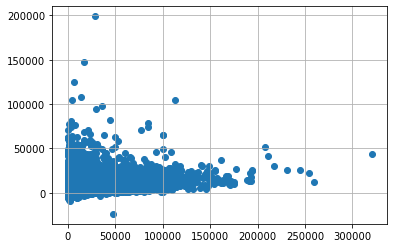

In [72]:
var = 'daily_decr90'
plt.scatter(x = df['daily_decr90'],y = df['rental30'],)
plt.grid(True)

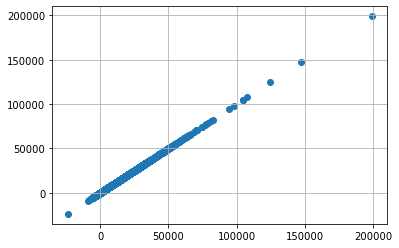

In [73]:
var = 'rental30'
plt.scatter(x = df['rental30'],y = df['rental30'],)
plt.grid(True)

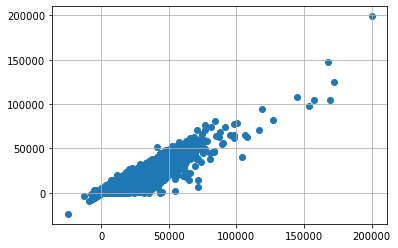

In [74]:
var = 'rental90'
plt.scatter(x = df['rental90'],y = df['rental30'],)
plt.grid(True)

# Classification Methods

In [75]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score


In [76]:
x = df.drop(['label'],axis=1)
y = df["label"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.2)

In [77]:

for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,"at random_state", i)
    

86.6813174102883 at random_state 0
86.5280629210884 at random_state 1
86.40083277911113 at random_state 2
86.37770002602436 at random_state 3
86.3690252436168 at random_state 4
86.50782176213747 at random_state 5
86.49914697972993 at random_state 6
86.1969753925339 at random_state 7
86.47456842957523 at random_state 8
86.57866581846572 at random_state 9
86.41095335858658 at random_state 10
86.44420669114882 at random_state 11
86.54396668883555 at random_state 12
86.41384495272244 at random_state 13
86.4311945175375 at random_state 14
86.4919179943903 at random_state 15
86.4673394442356 at random_state 16
86.251915681115 at random_state 17
86.33143451985079 at random_state 18
86.42107393806205 at random_state 19
86.47890582077899 at random_state 20
86.29239799901686 at random_state 21
86.49625538559408 at random_state 22
86.44565248821675 at random_state 23
86.38926640256773 at random_state 24
86.56999103605818 at random_state 25
86.47456842957523 at random_state 26
86.18974640719429 at

The random state can be increase and decrasing

In [78]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.47      0.49      0.48      8714
           1       0.93      0.92      0.92     60452

    accuracy                           0.87     69166
   macro avg       0.70      0.70      0.70     69166
weighted avg       0.87      0.87      0.87     69166

Test Accuracy:86.54%


The test accuracy value of decision tree classifier is 86.46%

In [79]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier: \n\n",classification_report(y_test,y_pred_lr))
print("Test Accuracy:{}%".format(round(lr.score(x_test,y_test)*100,2)))

Logistic Regression Classifier: 

               precision    recall  f1-score   support

           0       0.58      0.03      0.06      8714
           1       0.88      1.00      0.93     60452

    accuracy                           0.88     69166
   macro avg       0.73      0.51      0.50     69166
weighted avg       0.84      0.88      0.82     69166

Test Accuracy:87.51%


The test accuracy value og logistic regression is 87.51%

In [80]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred_KNN = KNN.predict(x_test)
print(" KNN Classifier: \n\n",classification_report(y_test,y_pred_KNN))
print("Test Accuracy:{}%".format(round(KNN.score(x_test,y_test)*100,2)))

 KNN Classifier: 

               precision    recall  f1-score   support

           0       0.43      0.23      0.30      8714
           1       0.90      0.96      0.93     60452

    accuracy                           0.86     69166
   macro avg       0.66      0.59      0.61     69166
weighted avg       0.84      0.86      0.85     69166

Test Accuracy:86.5%


The test accuracy value of KNN classifier is 86.5%

In [81]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
print(" Navie byes Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy:{}%".format(round(nb.score(x_test,y_test)*100,2)))

 Navie byes Classifier: 

               precision    recall  f1-score   support

           0       0.20      0.89      0.33      8714
           1       0.97      0.50      0.66     60452

    accuracy                           0.55     69166
   macro avg       0.59      0.69      0.49     69166
weighted avg       0.87      0.55      0.62     69166

Test Accuracy:54.73%


The test acuuracy of navie byes classifier is 54.37%

In [82]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(" Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))

 Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.76      0.44      0.56      8714
           1       0.92      0.98      0.95     60452

    accuracy                           0.91     69166
   macro avg       0.84      0.71      0.75     69166
weighted avg       0.90      0.91      0.90     69166

Test Accuracy:91.21%


The test accuracy of random forest classifier is 91.24%

# Cross value correction

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.7436168449076838


In [85]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.8760216154443097


In [86]:
print(cross_val_score(KNN,x,y,cv=5).mean())

0.7713043221007907


In [87]:
print(cross_val_score(nb,x,y,cv=5).mean())

0.5495555904899445


In [88]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.9047152276245896


# Hyperparameter tunning

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
param_grid = {
    'bootstrap':[True,False],
    'max_depth':[2,3,4],
    'max_features':['auto'],
    'min_samples_leaf':[3,5,7,10,20,40,50],
    'min_samples_split':[5,10,20,40,50],
    'n_estimators':[50,100,150,200]
}

In [91]:
rf = RandomForestClassifier()

In [92]:
rf_cv = GridSearchCV(rf, param_grid, cv=5)

In [ ]:
rf_cv.fit(x,y)

# AUC ROC Curve

In [95]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [96]:
y_pred_rf = lr.predict_proba(x_test)[:,1]
y_pred_rf

array([0.98173599, 0.72785457, 0.87055769, ..., 0.86801671, 0.72823039,
       0.83852523])

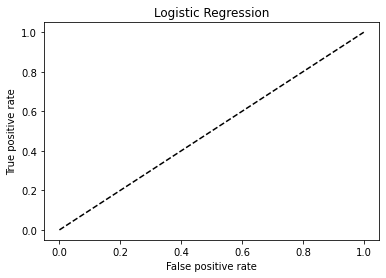

In [97]:
plt.plot([0,1],[0,1],'k--')
plt.plot(label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

# Evaluate the model

In [98]:
Final_mod = RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.18931266807391


# Saving the model

In [99]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

# Prediction method

In [101]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
preds = rf.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


The train and test data is balanced most classification methods hit the 91% accuracy with the datset.